In [1]:
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
MAX = 10
size = [1, 5, 5000, 8000, 12000, 20000, 30000, 40000, 50000, 60000]

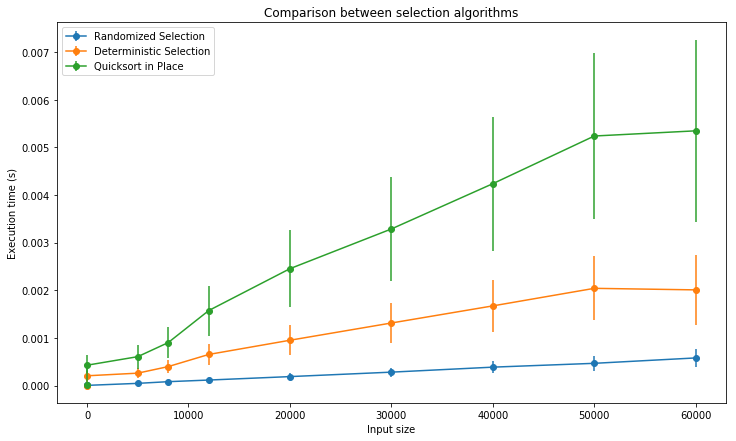

In [9]:
plt.figure(figsize=(12,7))
for flag in range(3):
    y=np.array([])
    conf_interval=np.array([])
    for cases in range(MAX):
        with open('../results/{}{}.out'.format(flag, cases), 'r') as f:
            data = f.read();
            time = data.split('\n')
            time = time[:-1]
            time = np.array(time)
            time = [float(i) for i in time]
            time = np.array(time)
            
            y = np.append(y, np.mean(time))
            n = y.size
            mean = np.mean(y)
            std = np.std(y)
            conf_interval = np.append(conf_interval, std)
    plt.errorbar(size, y, yerr = conf_interval, fmt = '-o')
plt.legend(['Randomized Selection', 'Deterministic Selection', 'Quicksort in Place'], loc = 'upper left')
plt.xlabel('Input size')
plt.ylabel('Execution time (s)')
plt.title('Comparison between selection algorithms')
plt.savefig('res.png')
plt.show()